In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import math
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon", quiet=True)

True

In [2]:
comp = 'AMZN'
tk = yf.Ticker(f"{comp}")
news_content = tk.get_news()

In [ ]:
d = []
for i in range(0, len(news_content)):
    dates = news_content[i]['content']['pubDate']
    d.append(dates)

headlines_list = []
for i in range(0, len(news_content)):
    headlines = news_content[i]['content']['title']
    headlines_list.append(headlines)

In [4]:
d

['2025-08-01T20:00:32Z',
 '2025-08-01T20:36:29Z',
 '2025-08-01T15:30:00Z',
 '2025-08-01T13:42:09Z',
 '2025-07-31T20:03:50Z',
 '2025-08-01T10:00:55Z',
 '2025-08-02T01:31:12Z',
 '2025-08-01T21:52:00Z',
 '2025-08-01T21:23:39Z',
 '2025-08-01T21:15:18Z']

In [6]:
len(headlines_list)

10

In [45]:
sentiment_df = pd.DataFrame()
sentiment_df['date'] = pd.Series(d)
sentiment_df['headlines'] = pd.Series(headlines_list)
sia = SentimentIntensityAnalyzer()
sentiment_df['sentiment'] = sentiment_df['headlines'].apply(lambda x: sia.polarity_scores(x))


In [8]:
sia = SentimentIntensityAnalyzer()

def computing_sentiments(dataframe):
    return dataframe['headlines'].apply(lambda x: sia.polarity_scores(x))


In [9]:
print(computing_sentiments(sentiment_df))

0    {'neg': 0.131, 'neu': 0.721, 'pos': 0.149, 'co...
1    {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...
2    {'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compou...
3    {'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...
4    {'neg': 0.084, 'neu': 0.844, 'pos': 0.071, 'co...
5    {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...
6    {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'comp...
7    {'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...
8    {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...
9    {'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'comp...
Name: headlines, dtype: object


In [10]:
stock_data = tk.history(period='5y', interval='1d')
log_returns = 100 * np.log(stock_data['Close']/stock_data['Close'].shift(1))
log_returns = log_returns.dropna()
log_returns

Date
2020-08-04 00:00:00-04:00    0.861986
2020-08-05 00:00:00-04:00    2.087132
2020-08-06 00:00:00-04:00    0.621153
2020-08-07 00:00:00-04:00   -1.800294
2020-08-10 00:00:00-04:00   -0.611183
                               ...   
2025-07-28 00:00:00-04:00    0.581606
2025-07-29 00:00:00-04:00   -0.767575
2025-07-30 00:00:00-04:00   -0.355591
2025-07-31 00:00:00-04:00    1.688603
2025-08-01 00:00:00-04:00   -8.631653
Name: Close, Length: 1255, dtype: float64

In [11]:
hist_vol = log_returns.rolling(window=7).std()

In [12]:
hist_vol = hist_vol.dropna()
hist_vol

Date
2020-08-12 00:00:00-04:00    1.837460
2020-08-13 00:00:00-04:00    1.817194
2020-08-14 00:00:00-04:00    1.593612
2020-08-17 00:00:00-04:00    1.645193
2020-08-18 00:00:00-04:00    2.099093
                               ...   
2025-07-28 00:00:00-04:00    0.905179
2025-07-29 00:00:00-04:00    1.002487
2025-07-30 00:00:00-04:00    0.898901
2025-07-31 00:00:00-04:00    0.991315
2025-08-01 00:00:00-04:00    3.561702
Name: Close, Length: 1249, dtype: float64

In [13]:
hist_vol.index = hist_vol.index.date

In [14]:
hist_vol

2020-08-12    1.837460
2020-08-13    1.817194
2020-08-14    1.593612
2020-08-17    1.645193
2020-08-18    2.099093
                ...   
2025-07-28    0.905179
2025-07-29    1.002487
2025-07-30    0.898901
2025-07-31    0.991315
2025-08-01    3.561702
Name: Close, Length: 1249, dtype: float64

In [15]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [16]:
sentiment_df

,date,headlines
0,2025-08-01,"Stock market today: Dow, S&P 500, Nasdaq tank ..."
1,2025-08-01,Big Tech's huge AI spending spree: A closer lo...
2,2025-08-01,July jobs report: AI is contributing to job cu...
3,2025-08-01,Amazon & Apple earnings: Takeaways from the te...
4,2025-07-31,"Stock market today: Dow, S&P 500, Nasdaq slide..."
5,2025-08-01,Tech earnings 'much more important' than Fed i...
6,2025-08-02,'The Trade War Has Lost All Credibility:' Mark...
7,2025-08-01,3 Artificial Intelligence (AI) Stocks That Cou...
8,2025-08-01,"Stocks to Watch Recap: Amazon, Coinbase, Reddi..."
9,2025-08-01,"Equities, Yields Tumble Following Jobs Report ..."


In [17]:
hist_vol.index

Index([2020-08-12, 2020-08-13, 2020-08-14, 2020-08-17, 2020-08-18, 2020-08-19,
       2020-08-20, 2020-08-21, 2020-08-24, 2020-08-25,
       ...
       2025-07-21, 2025-07-22, 2025-07-23, 2025-07-24, 2025-07-25, 2025-07-28,
       2025-07-29, 2025-07-30, 2025-07-31, 2025-08-01],
      dtype='object', length=1249)

In [18]:
match_dates = []
for date in hist_vol.index:
    if date in list(sentiment_df['date']):
        match_dates.append(date)

In [19]:
match_dates

[datetime.date(2025, 7, 31), datetime.date(2025, 8, 1)]

In [20]:
filtered_sentiment = sentiment_df[sentiment_df['date'].isin(match_dates)].copy()
filtered_hist_vol = hist_vol.loc[hist_vol.index.isin(match_dates)].copy()

In [21]:
if isinstance(filtered_hist_vol, pd.Series):
    filtered_hist_vol = filtered_hist_vol.to_frame(name='vol')

# Reset index to get 'date' as a column
filtered_hist_vol = filtered_hist_vol.reset_index().rename(columns={'index': 'date'})

In [22]:
combined_df = pd.merge(filtered_sentiment, filtered_hist_vol, on='date', how='inner')

In [23]:
combined_df

,date,headlines,vol
0,2025-08-01,"Stock market today: Dow, S&P 500, Nasdaq tank ...",3.561702
1,2025-08-01,Big Tech's huge AI spending spree: A closer lo...,3.561702
2,2025-08-01,July jobs report: AI is contributing to job cu...,3.561702
3,2025-08-01,Amazon & Apple earnings: Takeaways from the te...,3.561702
4,2025-07-31,"Stock market today: Dow, S&P 500, Nasdaq slide...",0.991315
5,2025-08-01,Tech earnings 'much more important' than Fed i...,3.561702
6,2025-08-01,3 Artificial Intelligence (AI) Stocks That Cou...,3.561702
7,2025-08-01,"Stocks to Watch Recap: Amazon, Coinbase, Reddi...",3.561702
8,2025-08-01,"Equities, Yields Tumble Following Jobs Report ...",3.561702


In [24]:
combined_df['sentiment'] = combined_df['headlines'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [25]:
combined_df['hist_vol'] = combined_df['vol']
combined_df = combined_df.drop(columns=['vol'])

In [26]:
combined_df

,date,headlines,sentiment,hist_vol
0,2025-08-01,"Stock market today: Dow, S&P 500, Nasdaq tank ...",0.1027,3.561702
1,2025-08-01,Big Tech's huge AI spending spree: A closer lo...,0.3182,3.561702
2,2025-08-01,July jobs report: AI is contributing to job cu...,-0.2960,3.561702
3,2025-08-01,Amazon & Apple earnings: Takeaways from the te...,0.1779,3.561702
4,2025-07-31,"Stock market today: Dow, S&P 500, Nasdaq slide...",-0.0772,0.991315
5,2025-08-01,Tech earnings 'much more important' than Fed i...,0.2716,3.561702
6,2025-08-01,3 Artificial Intelligence (AI) Stocks That Cou...,0.4767,3.561702
7,2025-08-01,"Stocks to Watch Recap: Amazon, Coinbase, Reddi...",0.1779,3.561702
8,2025-08-01,"Equities, Yields Tumble Following Jobs Report ...",-0.3818,3.561702


In [28]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
X = combined_df['sentiment'].values.reshape(-1, 1)
y = combined_df['hist_vol'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)




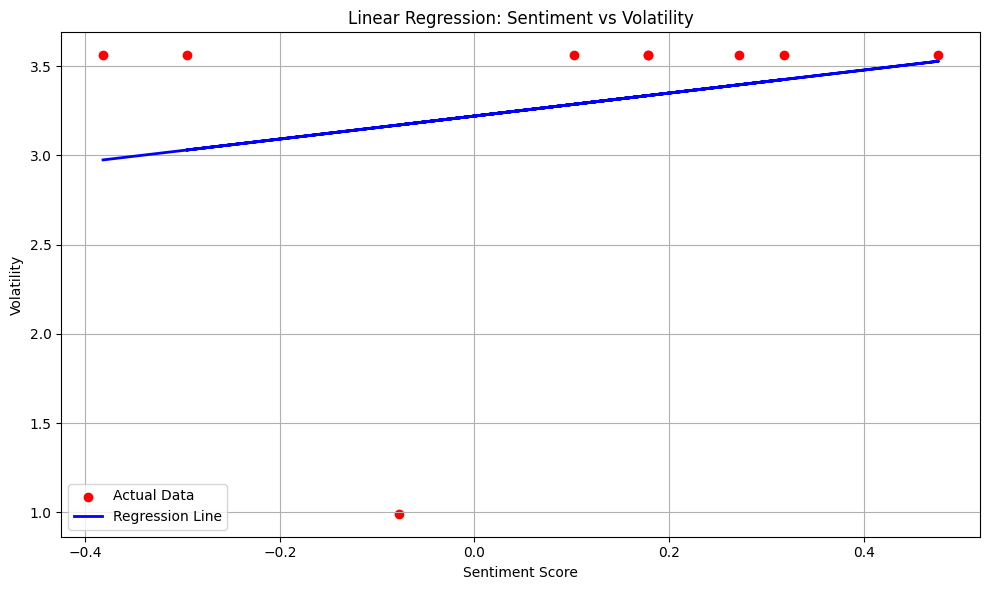

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X, y_pred, color='blue', linewidth=2, label='Regression Line')
plt.xlabel('Sentiment Score')
plt.ylabel('Volatility')
plt.title('Linear Regression: Sentiment vs Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
nearest_expiry = tk.options[0]
calls_df = tk.option_chain(nearest_expiry).calls
puts_df = tk.option_chain(nearest_expiry).puts
spot = tk.history(period='max', interval='1d')['Close'].iloc[-1]
atm_call = calls_df.iloc[(calls_df['strike'] - spot).abs().argmin()]
call_iv = atm_call['impliedVolatility']
atm_put = puts_df.iloc[(puts_df['strike'] - spot).abs().argmin()]
put_iv = atm_put['impliedVolatility']
daily_iv = ((call_iv + put_iv) / 2 if abs(call_iv - put_iv) <= 0.0001 else call_iv if call_iv > put_iv else put_iv) / np.sqrt(252)
daily_iv

np.float64(0.020285873859561605)

In [33]:
put_iv, call_iv

(np.float64(0.30103238037109376), np.float64(0.3220282641601562))

In [35]:
from arch import arch_model

In [42]:
am = arch_model(log_returns, vol='Garch', p=1, q=1)
res = am.fit(update_freq=5, disp="off")
print(res.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2714.62
Distribution:                  Normal   AIC:                           5437.23
Method:            Maximum Likelihood   BIC:                           5457.77
                                        No. Observations:                 1255
Date:                Sat, Aug 02 2025   Df Residuals:                     1254
Time:                        08:23:50   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0566  5.892e-02      0.960      0.337 [-5.89

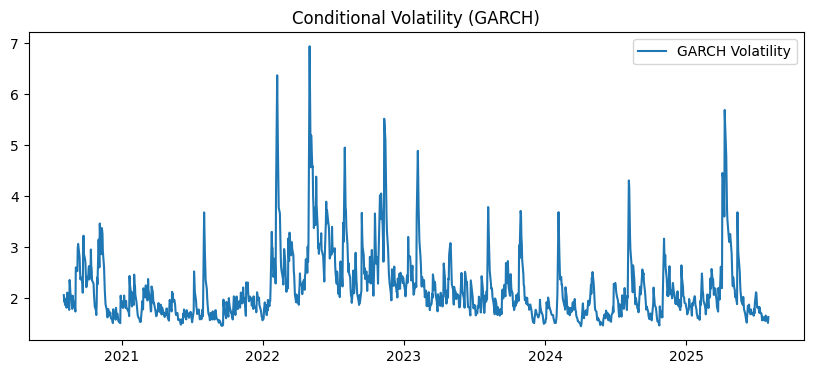

In [43]:
plt.figure(figsize=(10, 4))
plt.plot(res.conditional_volatility, label='GARCH Volatility')
plt.title('Conditional Volatility (GARCH)')
plt.legend()
plt.show()

In [ ]:
forecast_horizon = 5
forecasts = res.forecast(horizon=forecast_horizon)
last_historical_date = log_returns.index[-1]

forecast_dates = pd.date_range(start=last_historical_date + pd.Timedelta(days=1), periods=forecast_horizon, freq='B')
annualized_volatility_forecasts = []
for i in range(forecast_horizon):

    daily_variance_forecast = forecasts.variance.iloc[-1, i] / (100**2)
    annualized_vol = np.sqrt(daily_variance_forecast * 252) * 100
    annualized_volatility_forecasts.append(annualized_vol)

forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Annualized_Volatility_Forecast (%)': annualized_volatility_forecasts
})

print("\n--- Volatility Forecast (Annualized) ---")
print(forecast_df.to_string(index=False))


--- Volatility Forecast (Annualized) ---
                     Date  Annualized_Volatility_Forecast (%)
2025-08-04 00:00:00-04:00                           62.943550
2025-08-05 00:00:00-04:00                           61.223831
2025-08-06 00:00:00-04:00                           59.606667
2025-08-07 00:00:00-04:00                           58.087374
2025-08-08 00:00:00-04:00                           56.661395
